# KMN K najbliższych sąsiadów

In [1]:
import random
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score, balanced_accuracy_score
import random
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv

--2023-04-26 21:10:33--  https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 7381541 (7,0M) [text/plain]
Zapis do: `data.csv'

data.csv            100%[===================>]   7,04M   805KB/s     w 8,9s    

2023-04-26 21:10:42 (810 KB/s) - zapisano `data.csv' [7381541/7381541]



In [3]:
houses = pd.read_csv('data.csv')
houses.head(3)

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784


In [4]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


In [5]:
houses.columns

Index(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 'HistoricSite',
       'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'WaterProblems', 'TranspConcurrency', 'OtherProblems', 'lat', 'long'],
      dtype='object')

In [6]:
houses.columns.values

array(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'WfntLocation', 'WfntFootage', 'WfntBank',
       'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntAccessRights',
       'WfntProximityInfluence', 'TidelandShoreland', 'LotDepthFactor',
       'TrafficNoise', 'PowerLines', 'OtherNuisances', 'NbrBldgSites',
       'Contamination', 'AdjacentGolfFairway', 'AdjacentGreenbelt',
       'HistoricSite', 'CurrentUseDesignation', 'NativeGrowthProtEsmt',
       'Easements', 'OtherDesignation', 'DeedRestrictions',
       'DevelopmentRightsPurch', 'WaterProblems', 'TranspConcurrency',
       'OtherProblems', 'lat', 'long'], dtype=object)

In [7]:
values = houses['AppraisedValue']

### Wybór atrybutów
Wyscie : AppraisedValue
Wesscie
SqFtLot
lat
long


In [8]:
houses.drop('AppraisedValue',1, inplace=True)

/tmp/ipykernel_8846/1526003396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedValue',1, inplace=True)


 Normalizacja

In [9]:
houses = (houses - houses.mean())/(houses.max()-houses.min())

In [10]:
houses = houses[['SqFtLot','lat','long']]

In [11]:
houses

,SqFtLot,lat,long
0,0.926695,-0.002260,-0.002427
1,0.012250,0.004289,-0.001374
2,-0.002550,0.006580,-0.003288
3,-0.002521,0.002422,-0.003454
4,-0.002293,0.001717,-0.002164
...,...,...,...
52415,-0.001795,0.008325,-0.003298
52416,-0.002008,0.001734,-0.003295
52417,-0.001822,0.008236,-0.003241
52418,-0.001764,0.008330,-0.003282


### Podział danych
trening 80% test 20%

In [12]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows=set(range(len(houses))) - set(test_rows)

In [13]:
df_test = houses.loc[test_rows]
df_train = houses.loc[train_rows]

test_values = values.loc[test_rows]
train_values = values.loc[train_rows]

/tmp/ipykernel_8846/3802386928.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_8846/3802386928.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


In [14]:
# print(type(test_values))

### KNN implementacja manualna

In [15]:
kdtree = KDTree(houses)

Funkcja przydzielająca predykcję

In [16]:
def predict(query_point, k):
    ''' k liczba sąsiadów'''
    _, idx = kdtree.query(query_point, k)
    return np.mean(values.iloc[idx])

In [17]:
train_predicted_values = []
train_actual_values = []

In [18]:
for _id, row in df_train.iterrows():
  prediction = predict(row, 5)
  train_predicted_values.append(prediction)
  train_actual_values.append(train_values[_id])

### Wyznaczanie błędu regresji

Za pomocą MAE

In [19]:
mae = mean_absolute_error(train_actual_values, train_predicted_values)

In [20]:
f'Sredni blad bezwzgledny dla danych testowych wynosi: {mae}'

'Sredni blad bezwzgledny dla danych testowych wynosi: 59291.458031285765'

### Zad1. 
    Wykorzystać powyższy przykład w celu znalezienia takiej wartości K, dla której wartość średniego błędu bezwzględnego na systemie treningowym

będzie najmniejsza. W tym celu należy stworzyć wykres liniowy, na którym oś x będzie przedstawiała wartość K, a oś y będzie przedstawiała wartość funkcji błędu. Następnie dla "najlepszej" wartości K sprawdzić wartość funkcji błędu na systemie testowym.

### Ilosc sąsiadow i błąd

In [25]:
number_neigbours = []
absolute_error = []
for i in range(2,5):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        prediction = predict(row, i)
        train_predicted_values.append(prediction)
        train_actual_values.append(train_values[_id])
    mae = mean_absolute_error(train_actual_values, train_predicted_values)
    absolute_error.append(mae)

    

In [26]:
print(len(number_neigbours),  absolute_error)

3 [61417.93611777687, 60899.5095484982, 60674.890310936644]


## Wykres

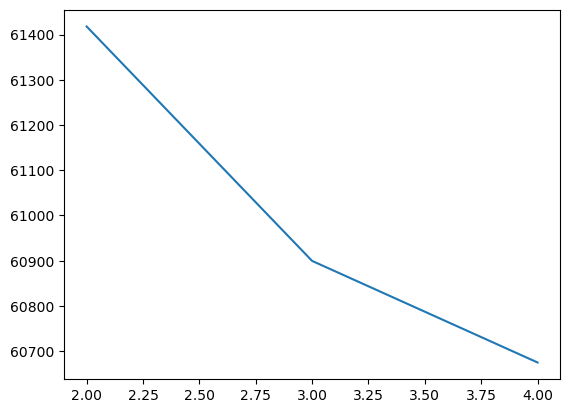

In [27]:
fig, ax = plt.subplots()
ax.plot(number_neigbours, absolute_error)

plt.show()

najmniejszy  blad

In [28]:
min_error = np.min(absolute_error)

In [29]:
min_error

60674.890310936644

#### Ilość sąsiadów

In [32]:
num_neighbour = [i for i, j in enumerate(absolute_error) if j == min_error]
num_neighbour
number_neigbours[num_neighbour[0]]

4

In [33]:
num_neighbour

[2]

### Zad2. Znaleźć "najlepszą" wartość K dla następujących podziałów na system treningowy i testowy:

    60% system treningowy i 40% system testowy
    65% system treningowy i 35% system testowy
    70% system treningowy i 30% system testowy
    75% system treningowy i 25% system testowy


Funkcja Podzial danych 

In [31]:
def split_data_test(percent_test):
    test_rows = set(random.sample(houses.index.tolist(), int(round(len(houses)* percent_test/100))))   
    return test_rows

In [ ]:
list_percents_test = [40, 35, 30, 5]
for percent in list_percents_test:
    test_rows = split_data_test(percent)
    train_rows = set(range(len(houses))) - test_rows
    df_test = houses.loc[test_rows]
    df_train = houses.loc[train_rows]
    test_values = values.loc[test_rows]
    train_values = values.loc[train_rows]
    number_neigbours = []
    absolute_error = []
    for i in range(3,10):
        number_neigbours.append(i)
        for _id, row in df_train.iterrows():
            prediction = predict(row, i)
            #try:
            train_predicted_values.append(prediction)
            train_actual_values.append(train_values[_id])
            #except:
             #   import pdb
              #  pdb.set_trace()
        mae = mean_absolute_error(train_actual_values, train_predicted_values)
        absolute_error.append(mae)
    min_error = np.min(absolute_error)
    num_neighbour = [i for i, j in enumerate(absolute_error) if j == min_error]
    print(number_neigbours[num_neighbour[0]])
    fig, ax = plt.subplots()
    ax.plot(number_neigbours, absolute_error)
    plt.show()
   


# Klasyfikacja KNN przy użyciu pakietu Scikit learn

## Wczytanie danych


In [35]:
houses = pd.read_csv('data.csv')

### Przygotowanie systemu decyzyjnego do klasyfikacji

In [36]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


##### Zbadamy atrybut WaterSystem jako atrybut decyzyjny

In [37]:
houses['WaterSystem'].value_counts()

2    50448
1     1947
0       20
3        3
4        2
Name: WaterSystem, dtype: int64

#### Podział na atrybuty wejściowe (X) i decyzyjny (y) oraz na system treningowy i testowy w stosunku 80%:20%

In [38]:
houses=houses.query('WaterSystem in [1,2]').reset_index()

In [39]:
values = houses['WaterSystem']
houses.drop('WaterSystem',1, inplace=True)


/tmp/ipykernel_8846/3670161529.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('WaterSystem',1, inplace=True)


In [ ]:
houses

Normalizacja

In [ ]:
houses = (houses - houses.mean())/(houses.max()-houses.min())

In [ ]:
houses = houses[['SqFtLot','lat','long','AppraisedValue']]

In [ ]:
values

In [ ]:
houses

Podział na dane treningowe i testowe

In [ ]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows=set(range(len(houses))) - set(test_rows)

In [ ]:
df_test = houses.loc[test_rows]
df_train = houses.loc[train_rows]

test_values = values.loc[test_rows]
train_values = values.loc[train_rows]

In [ ]:
train_rows

In [ ]:
df_train

### KNN implementacja manualna

In [ ]:
kdtree = KDTree(houses)

Funkcja przydzielająca decyzję

In [ ]:
def classify(query_point, k):
    _, idx =kdtree.query(query_point, k)
    return np.argmax(np.bincount(values.iloc[idx]))

In [ ]:
train_predicted_values = []
train_actual_values = []

In [ ]:
for _id, row in df_train.iterrows():
  prediction = classify(row,7)
  train_predicted_values.append(prediction)
  train_actual_values.append(train_values[_id])

### Wyznaczanie błędu klasyfikacji
#### za pomocą entropii krzyżowej

In [ ]:
ce = log_loss(train_actual_values, train_predicted_values)

In [ ]:
ce

### Wyznaczanie dokładności klasyfikacji

In [34]:
acc = balanced_accuracy_score(train_actual_values, train_predicted_values)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
acc

### Ilość sąsiadów i decyzja

In [ ]:
number_neigbours = []
absolute_error = []
for i in range(2,5):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        decision = classify(row, i)
        train_predicted_values.append(decision)
        train_actual_values.append(train_values[_id])
    ce = log_loss(train_actual_values, train_predicted_values)
    absolute_error.append(ce)


In [ ]:
absolute_error

In [ ]:
fig, ax = plt.subplots()
ax.plot(number_neigbours, absolute_error)

plt.show()